In [1]:
import polars as pl 
import polars.selectors as cs
import seaborn as sns
import utils
import get_data
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.manifold import TSNE
import itertools
import umap 
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_mutual_info_score, mutual_info_score, adjusted_rand_score

c:\Users\faune\miniconda3\envs\thesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reducer = umap.UMAP()

In [3]:
frame = pl.read_parquet(r"C:\Users\faune\Desktop\thesis\stanford_sentiment.parquet")

In [22]:
kmeans = KMeans(n_clusters=2, random_state=2)
frame = frame.with_columns(
    pl.Series(
        name= 'clusters',
        values= kmeans.fit_predict(frame.select('embeddings').to_series().to_list())
    )
)

In [23]:
print('Rand Score (RS):                 ', rand_score(labels_true=frame.select('label').to_series().to_list(), labels_pred=frame.select('clusters').to_series().to_list()))
print('Adjusted Rand Score (ARS):       ', adjusted_rand_score(labels_true=frame.select('label').to_series().to_list(), labels_pred=frame.select('clusters').to_series().to_list()))
print('Adjusted Mutual Info Score (AMI):', adjusted_mutual_info_score(labels_true=frame.select('label').to_series().to_list(), labels_pred=frame.select('clusters').to_series().to_list()))
print('Mutual Info Score (MI):          ', mutual_info_score(labels_true=frame.select('label').to_series().to_list(), labels_pred=frame.select('clusters').to_series().to_list()))

Rand Score (RS):                  0.8613280876841903
Adjusted Rand Score (ARS):        0.7225892608139667
Adjusted Mutual Info Score (AMI): 0.6131630448257939
Mutual Info Score (MI):           0.4201820741688528


In [6]:
reducer = umap.UMAP()

In [7]:
reduced = reducer.fit_transform(frame.select('embeddings').to_series().to_list())

In [11]:
frame = frame.with_columns(pl.Series(name = 'reduced', values = reduced))

<Axes: xlabel='field_0', ylabel='field_1'>

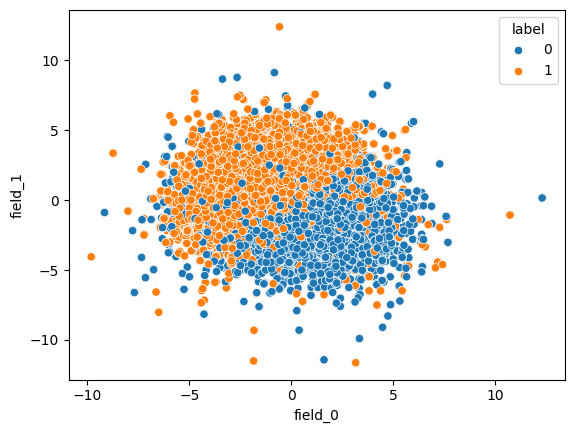

In [19]:
import seaborn as sns 

sns.scatterplot(data = frame.to_pandas(), x = 'field_0', y = 'field_1', hue = 'label')